# Reproduce Runge Phenomenon

## Define Runge Funtion
Consider Runge function:
$f(x)=\dfrac{1}{1+x^2}$ for $x\in[-5,5]$

We can also use
$f(x)=\dfrac{1}{1+25x^2}$ for $x\in[-1,1]$
by substitution to show the Runge phenomenon.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
import ipywidgets as widgets
from IPython.display import display

In [3]:
# Define the Runge function
def runge_function(x):
    return 1 / (1 +  25*x**2)

## Interpolation (1)
Here we pick nodes uniformly on $[-1,1]$ and setting degree of interpolating polynomials to be 3, 5, 7, ..., 25

In [4]:
sup_errors = []
def interpolate_and_plot_uniform(n):
    x_nodes = np.linspace(-1, 1, n+1) # (n+1 nodes for degree n)
    y_nodes = runge_function(x_nodes) # Runge function values at nodes
    poly = np.polyfit(x_nodes, y_nodes, n) # degree n polynomial fit

    x_plot = np.linspace(-1, 1, 1000) 
    y_plot = runge_function(x_plot)
    y_interp = np.polyval(poly, x_plot)
    
    sup_error = np.max(np.abs(y_plot - y_interp))  # supremum error 
    if sup_error not in sup_errors:
        sup_errors.append(sup_error)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x_plot, y_plot, 'k', label='Runge function')
    plt.plot(x_plot, y_interp, label=f'Interpolation (deg={n})')
    plt.plot(x_nodes, y_nodes, 'o', label='Nodes')
    plt.ylim(-0.5, 1.5)
    plt.legend()
    plt.grid()
    plt.title(f'Runge Phenomenon (n={n})\nSupremum error: {sup_error:.4e}')

    plt.subplot(1, 2, 2)
    plt.plot(x_plot, np.abs(y_plot - y_interp), 'r')
    plt.title('Absolute Error')
    plt.xlabel('x')
    plt.ylabel('|f(x) - p(x)|')
    plt.grid()
    plt.tight_layout()
    plt.show()

In [5]:
def show_slideshow(i):
    n = 2*(i+1) + 1
    interpolate_and_plot_uniform(n)

slider = widgets.IntSlider(min=0, max=11, step=1, description='Graph')
widgets.interact(show_slideshow, i=slider)

interactive(children=(IntSlider(value=0, description='Graph', max=11), Output()), _dom_classes=('widget-intera…

<function __main__.show_slideshow(i)>

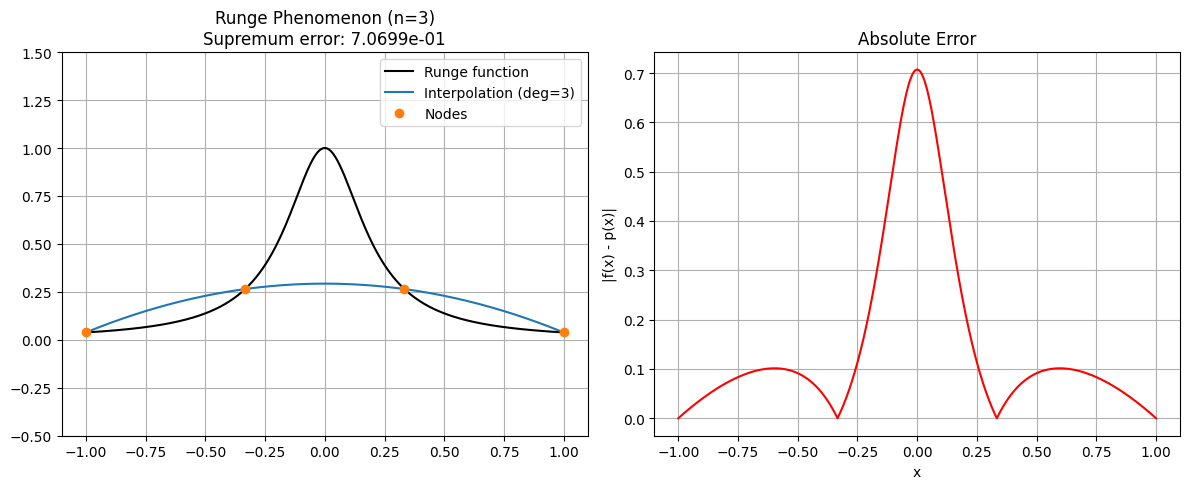

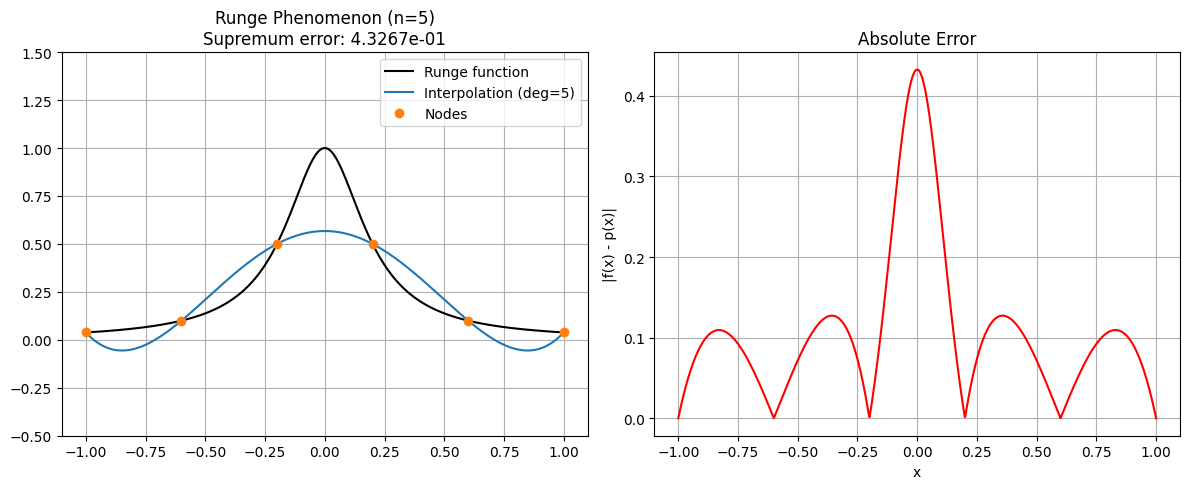

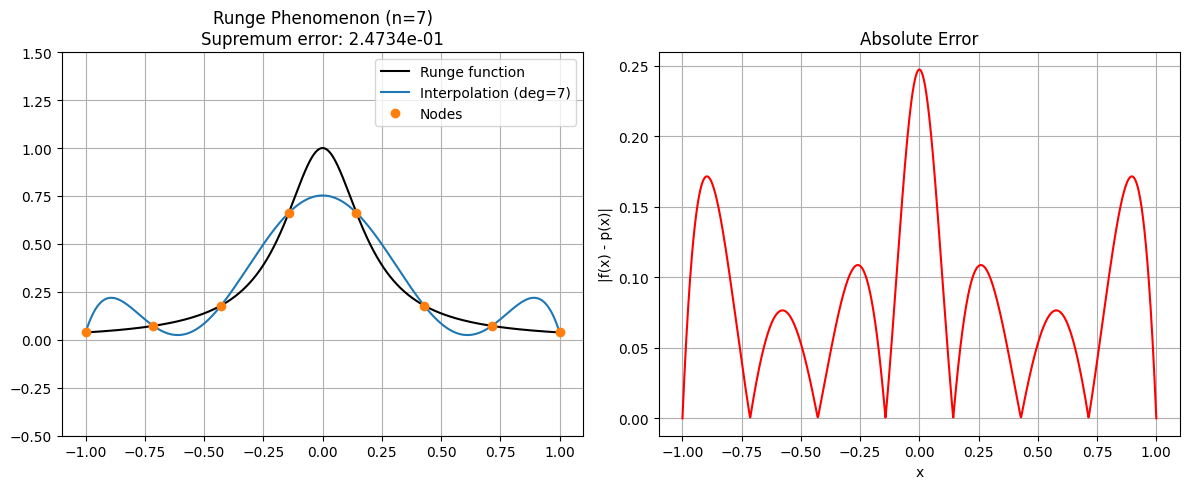

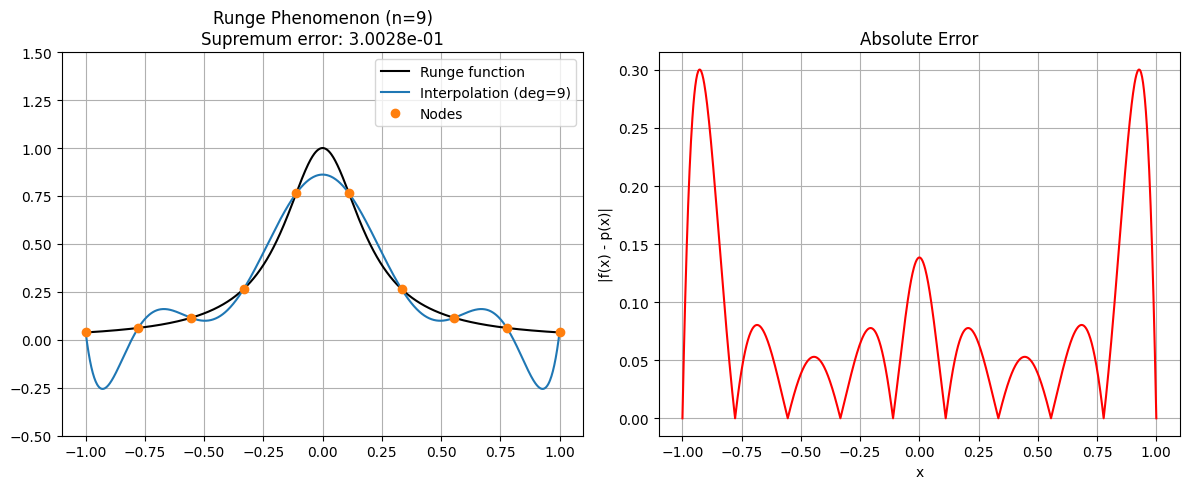

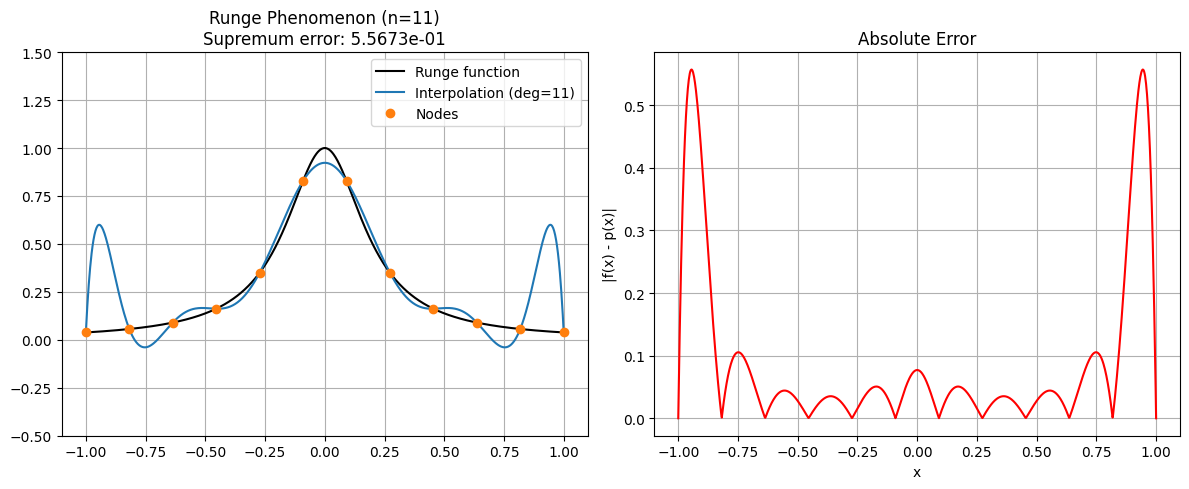

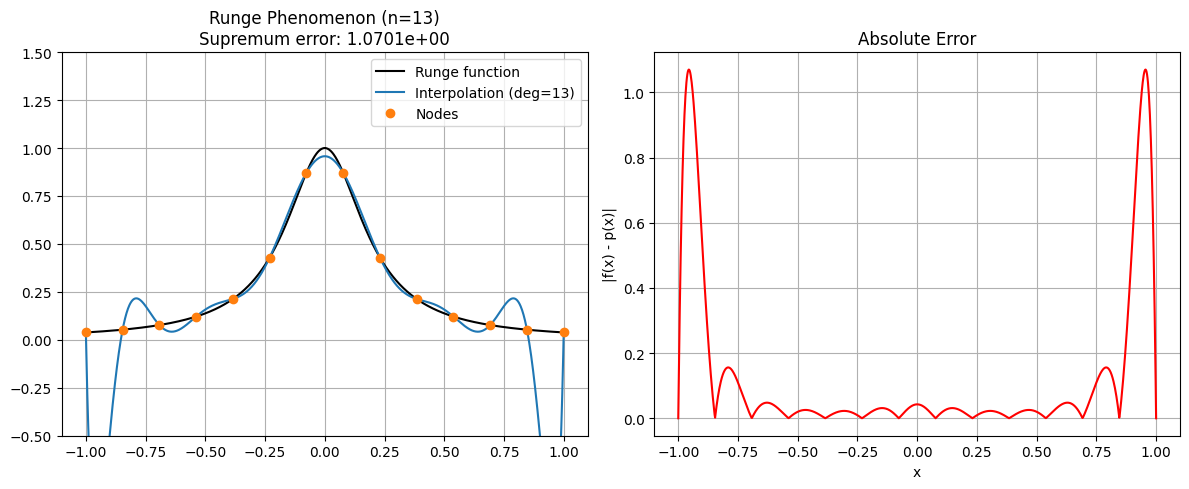

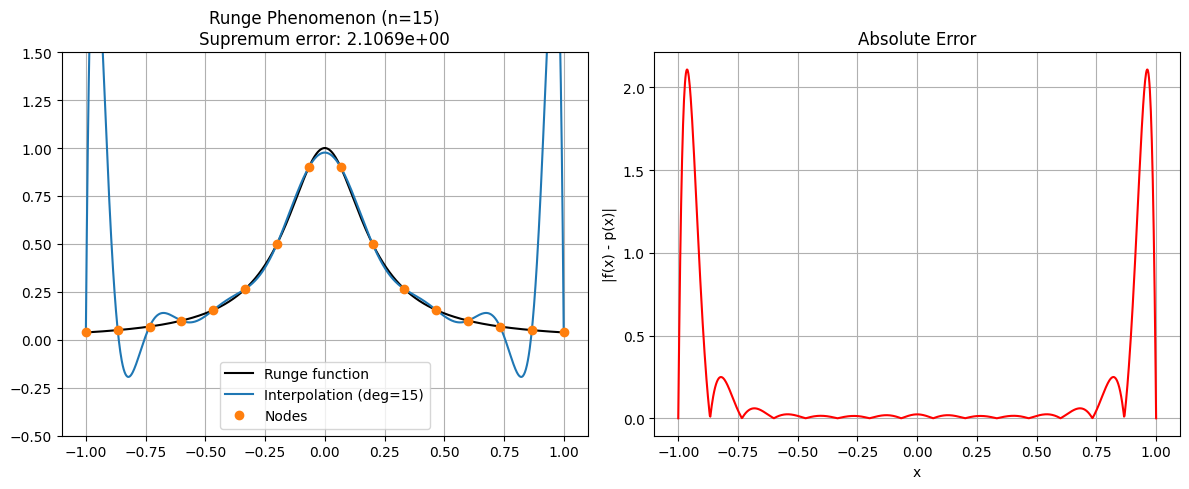

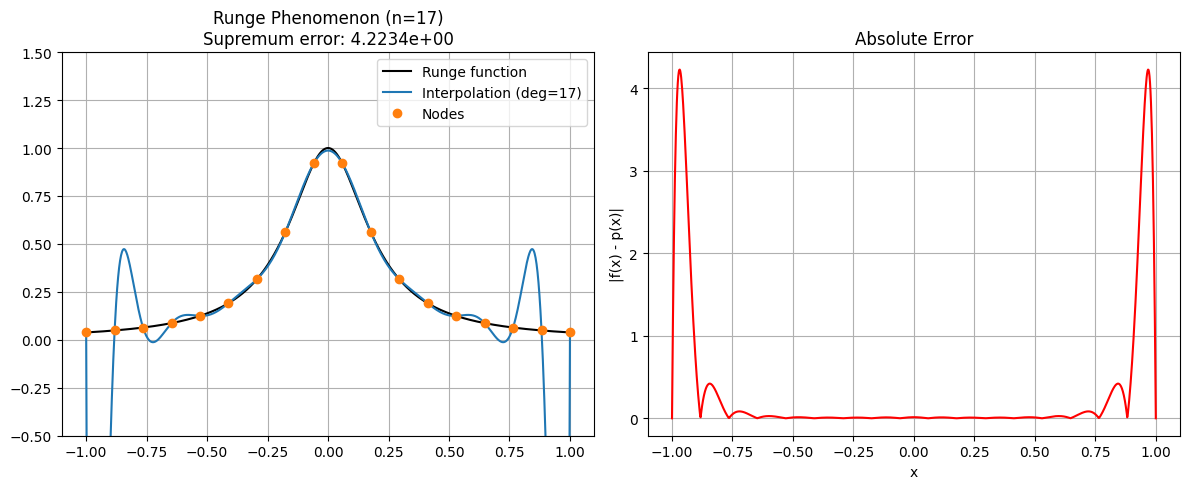

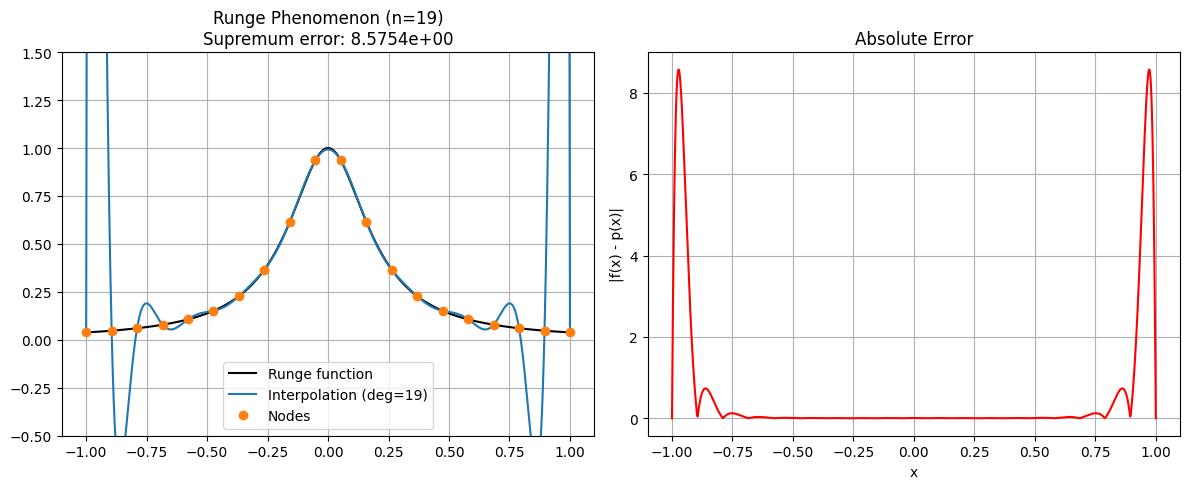

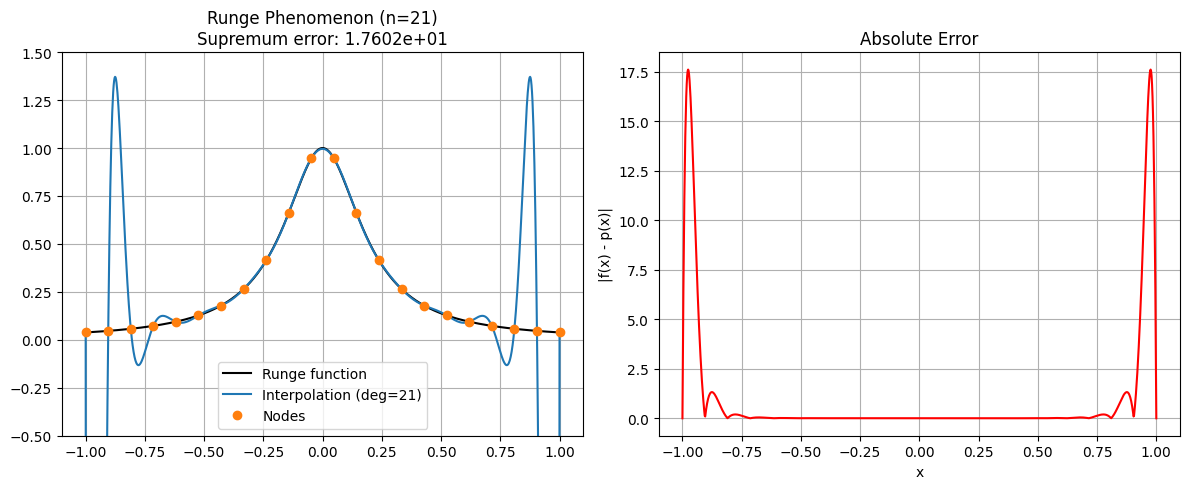

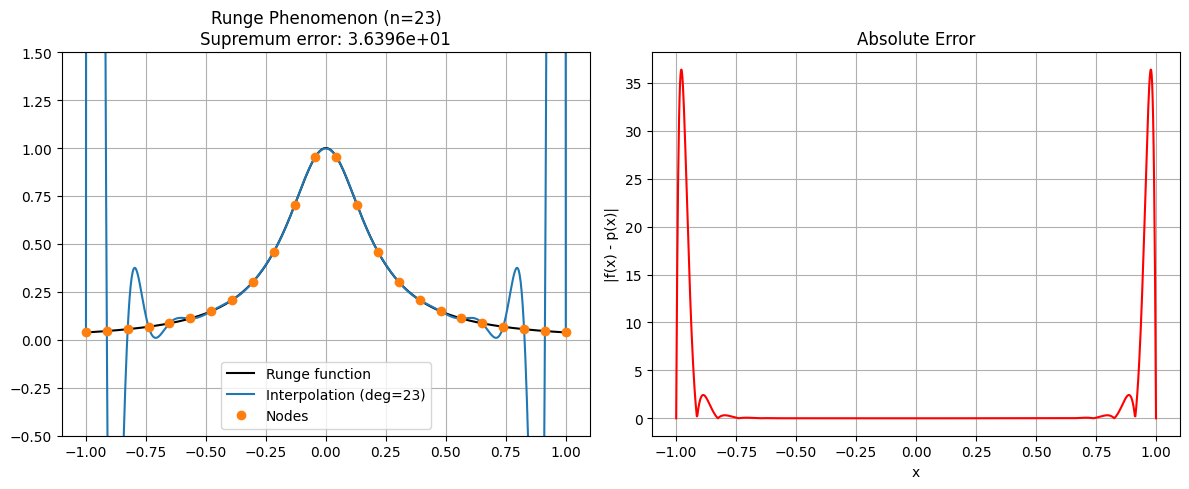

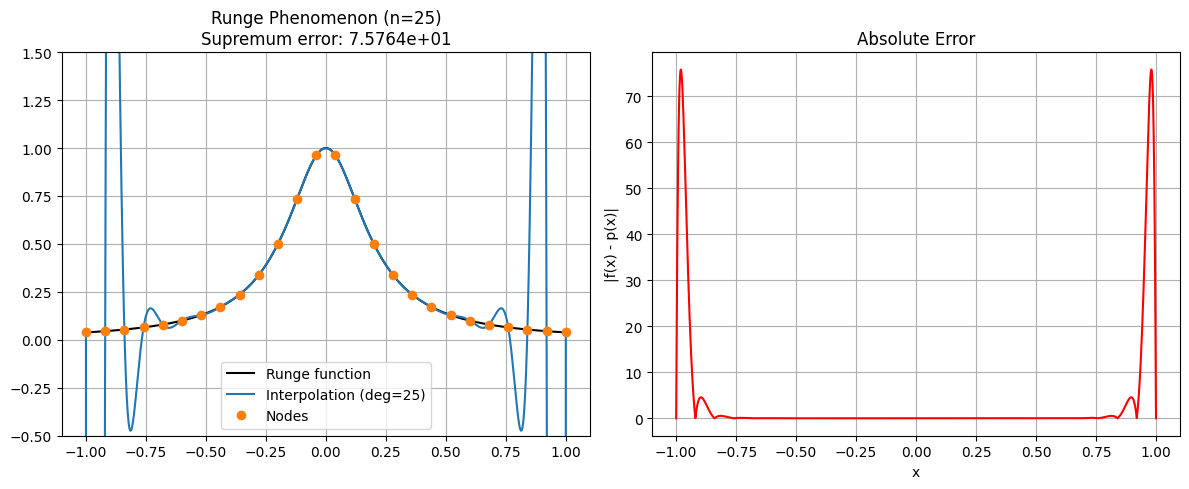

In [6]:
for i in range(12):
    n = 2*(i+1) + 1
    interpolate_and_plot_uniform(n)

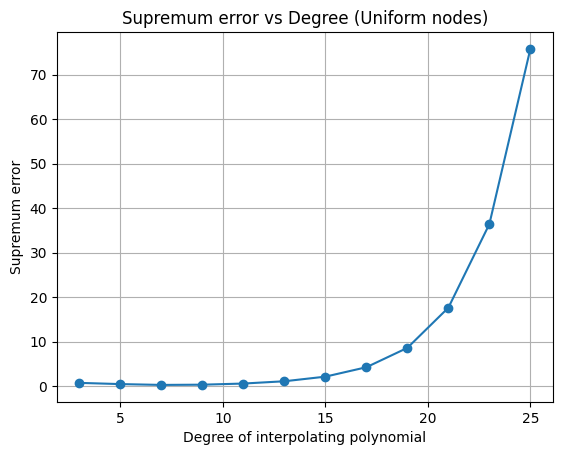

In [7]:
degrees = [2*(i+1) + 1 for i in range(12)]
plt.figure()
plt.plot(degrees, sup_errors, marker='o')
plt.xlabel('Degree of interpolating polynomial')
plt.ylabel('Supremum error')
plt.title('Supremum error vs Degree (Uniform nodes)')
# plt.yscale('log')
plt.grid()
plt.show()

### Observation (1)
Here we can see that when degree of interpolating polynomial increases, the approximation near the $x=0$ is more closer. However, when $x$ approaches $-1$ or $1$, the error increases dramatically.

## Interpolation (2)
Here we pick nodes by Chebyshev's on $[-1,1]$ and setting degree of interpolating polynomials to be 3, 5, 7, ..., 25

### Generating Chebyshev's nodes
For interval $[-1,1]$, the Chebyshev's nodes is defined by the roots of Chebyshev's polynomials $T_{n+1}(x)$, which is $$x_k=\cos\left(\dfrac{2k+1}{2(n+1)}\pi\right)$$, where $k=0, 1, 2, \cdots, n$
If we want to map the interval from $[-1,1]$ to $[a,b]$, then we just need to do the linear transformation:
$$x_k^{[a,b]}=\dfrac{b-a}{2}x_k+\dfrac{a+b}{2}$$

In [8]:
def chebyshev_nodes(n, a=-1, b=1):
    k = np.arange(n+1)
    x = np.cos((2*k + 1) * np.pi / (2*(n+1)))   # Chebyshev's nodes in [-1,1]
    return (b - a)/2 * x + (a + b)/2            # map to [a,b]


In [9]:
sup_errors = []
def interpolate_and_plot_Chebyshev(n):
    x_nodes = chebyshev_nodes(n)
    y_nodes = runge_function(x_nodes)
    poly = np.polyfit(x_nodes, y_nodes, n)  # degree n-1 for n nodes

    x_plot = np.linspace(-1, 1, 1000)
    y_plot = runge_function(x_plot)
    y_interp = np.polyval(poly, x_plot)
    
    sup_error = np.max(np.abs(y_plot - y_interp))  # supremum error
    if sup_error not in sup_errors:
        sup_errors.append(sup_error)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x_plot, y_plot, 'k', label='Runge function')
    plt.plot(x_plot, y_interp, label=f'Interpolation (deg={n})')
    plt.plot(x_nodes, y_nodes, 'o', label='Nodes')
    plt.ylim(-0.5, 1.5)
    plt.legend()
    plt.grid()
    plt.title(f'Runge Phenomenon (n={n})\nSupremum error: {sup_error:.2e}')

    plt.subplot(1, 2, 2)
    plt.plot(x_plot, np.abs(y_plot - y_interp), 'r')
    plt.title('Absolute Error')
    plt.xlabel('x')
    plt.ylabel('|f(x) - p(x)|')
    plt.grid()
    plt.tight_layout()
    plt.show()

In [10]:
def show_slideshow(i):
    n = 2*(i+1) + 1
    interpolate_and_plot_Chebyshev(n)

slider = widgets.IntSlider(min=0, max=11, step=1, description='Graph')
widgets.interact(show_slideshow, i=slider)

interactive(children=(IntSlider(value=0, description='Graph', max=11), Output()), _dom_classes=('widget-intera…

<function __main__.show_slideshow(i)>

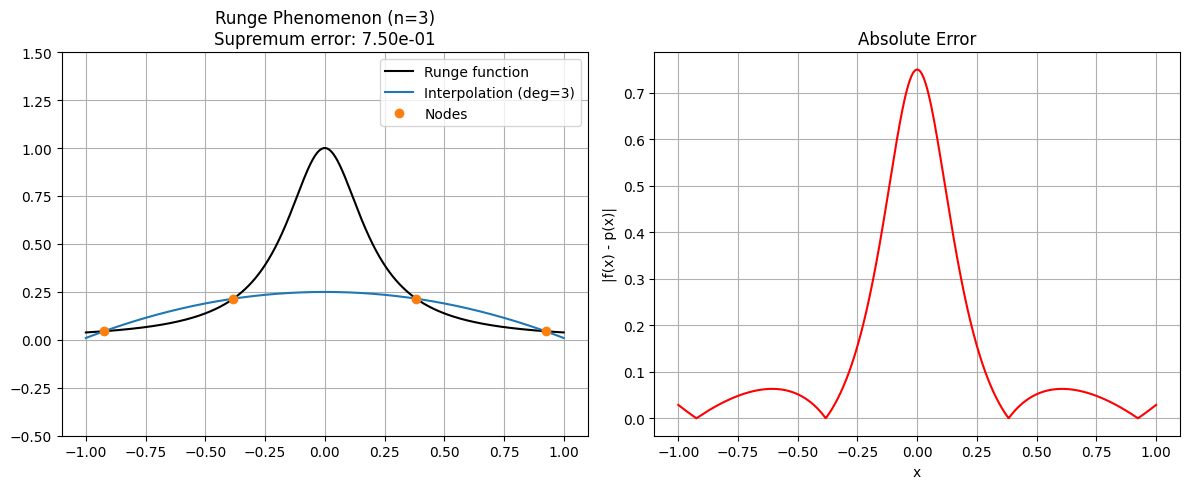

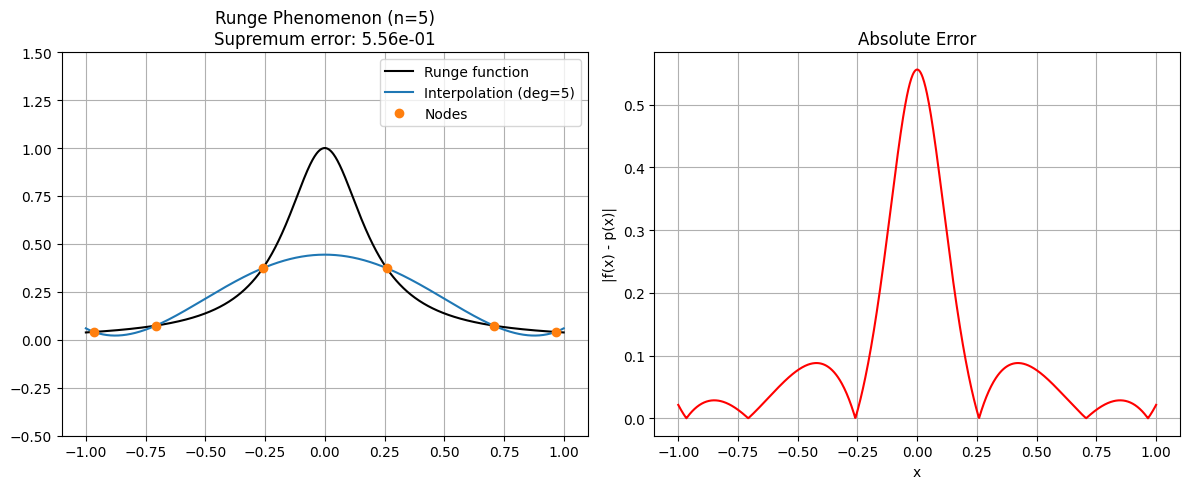

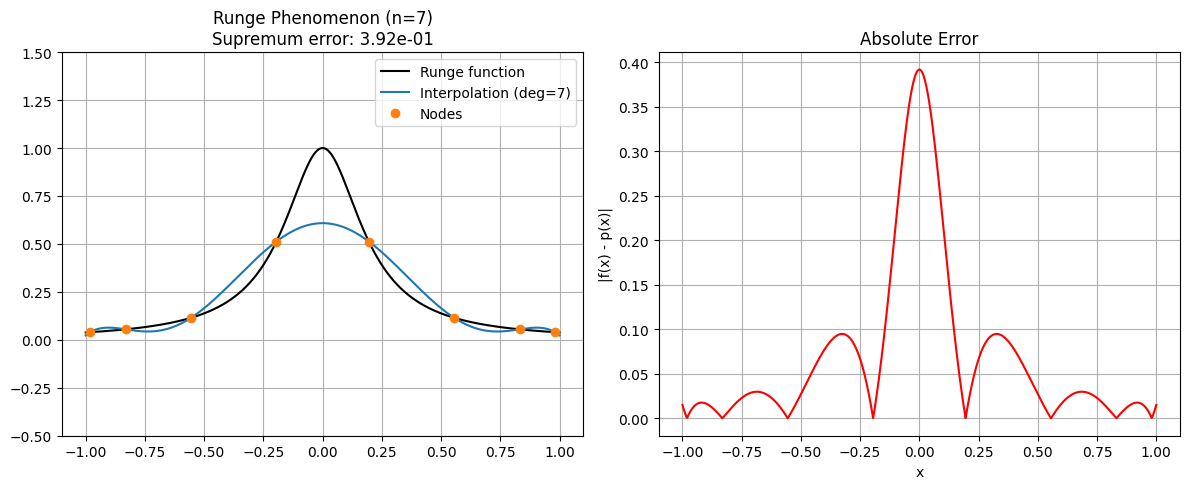

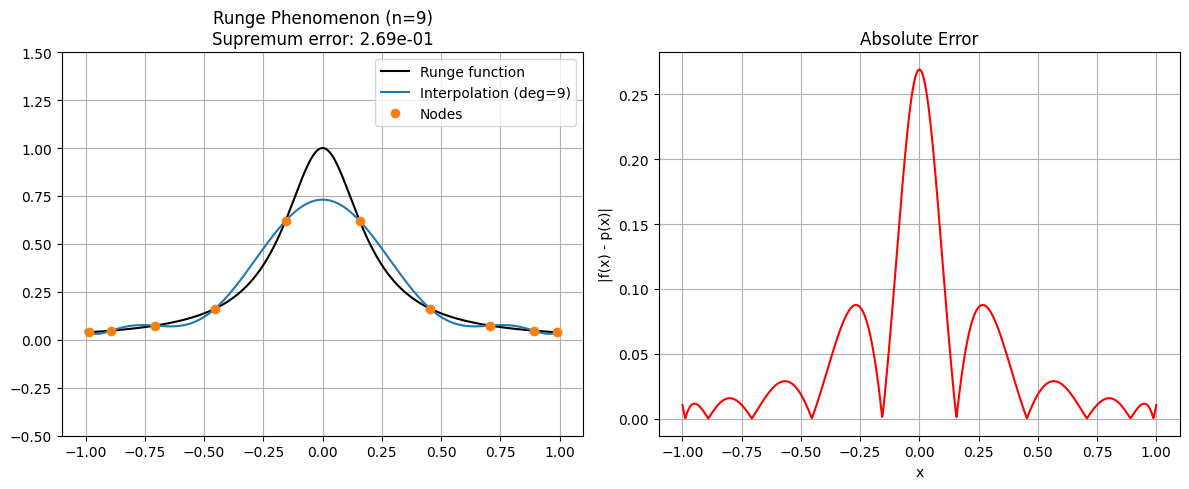

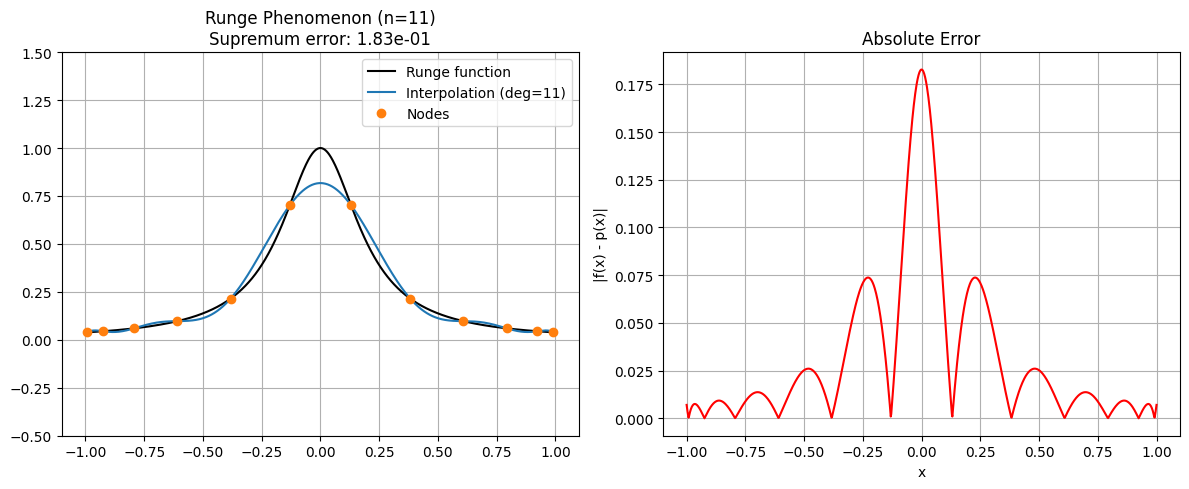

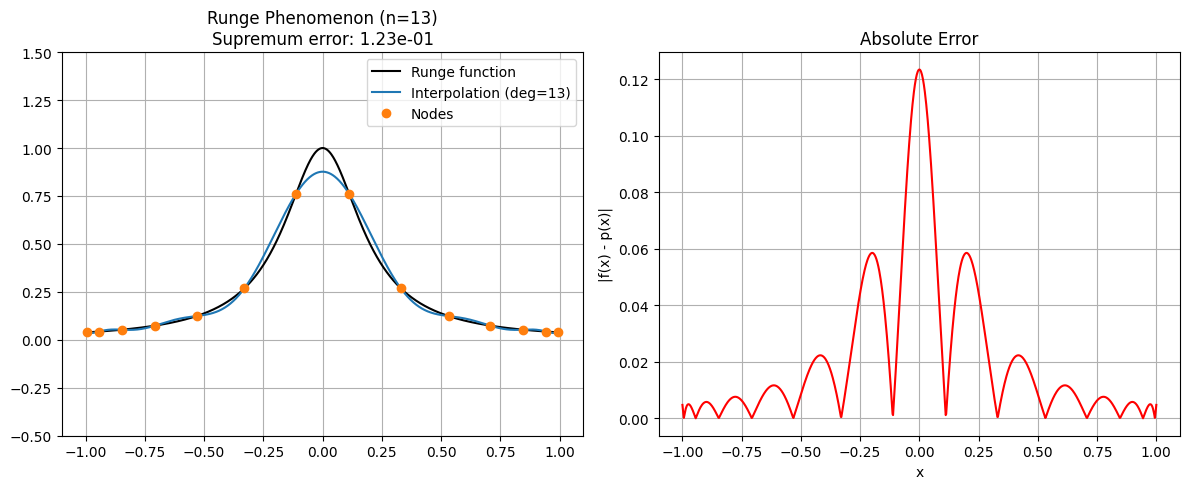

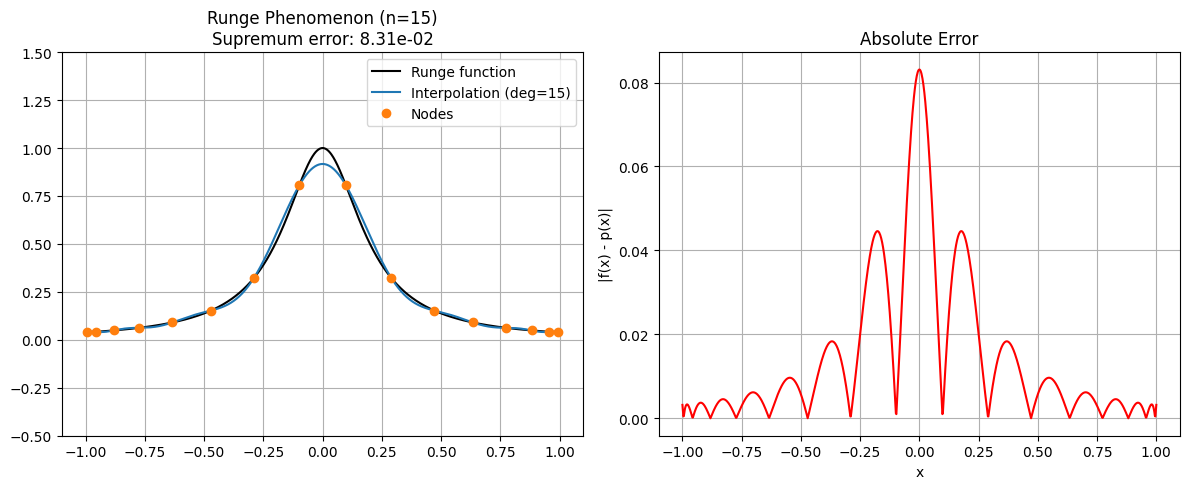

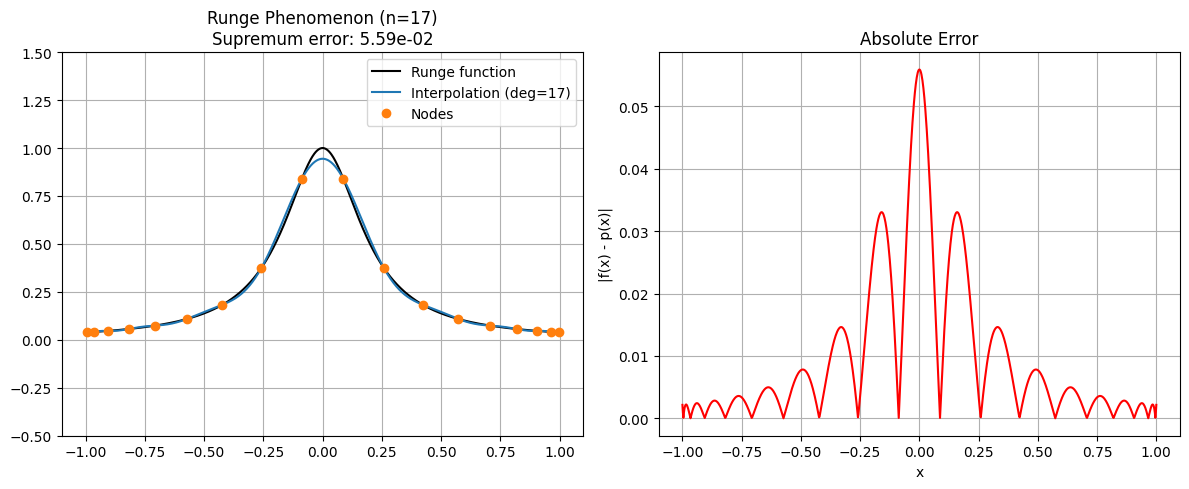

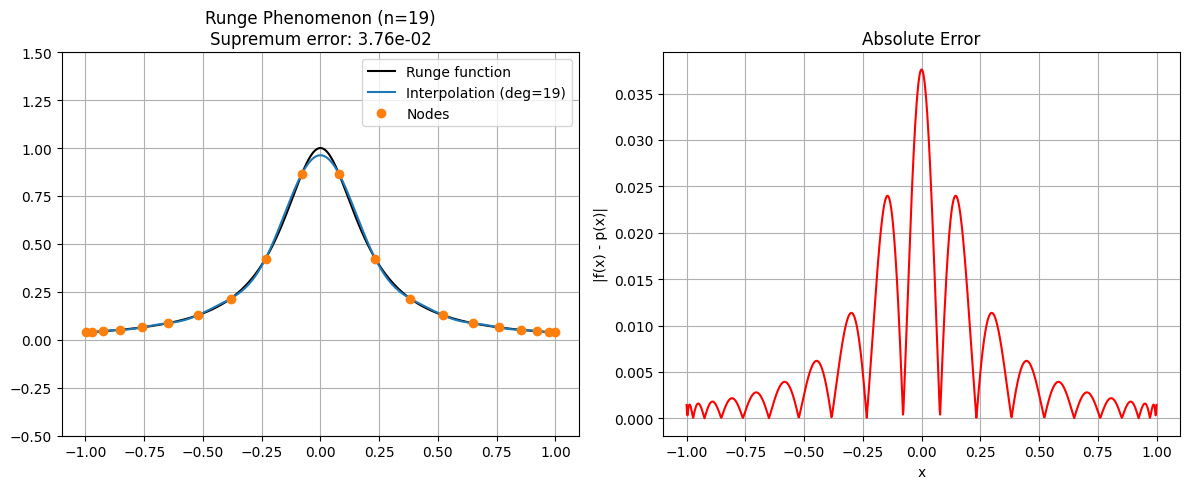

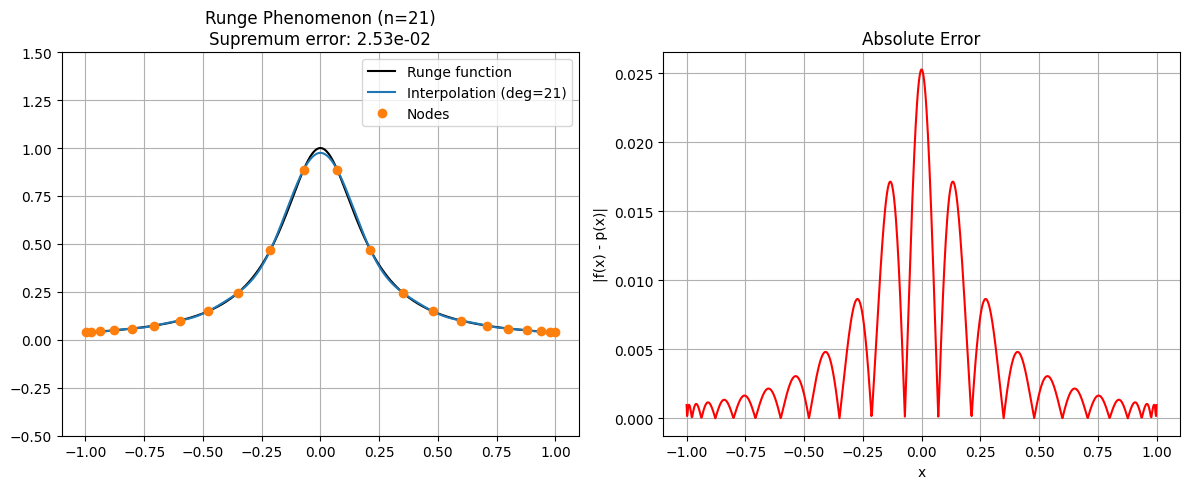

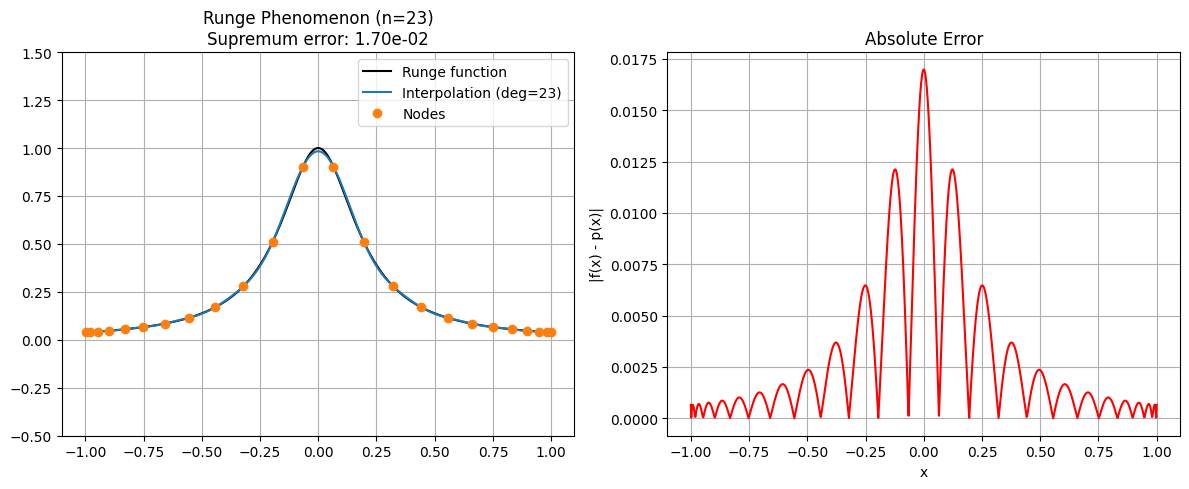

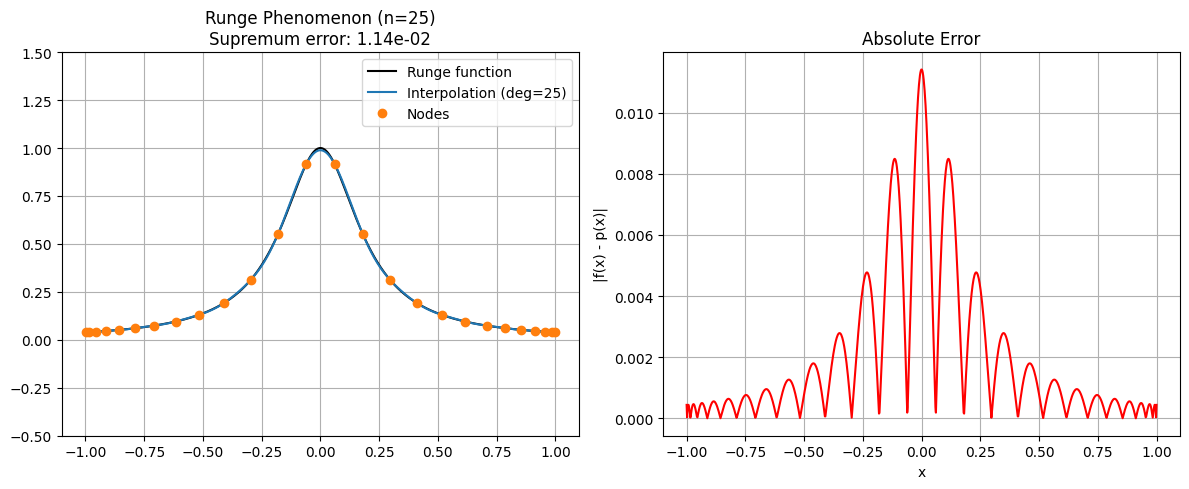

In [11]:
for i in range(12):
    n = 2*(i+1) + 1
    interpolate_and_plot_Chebyshev(n)

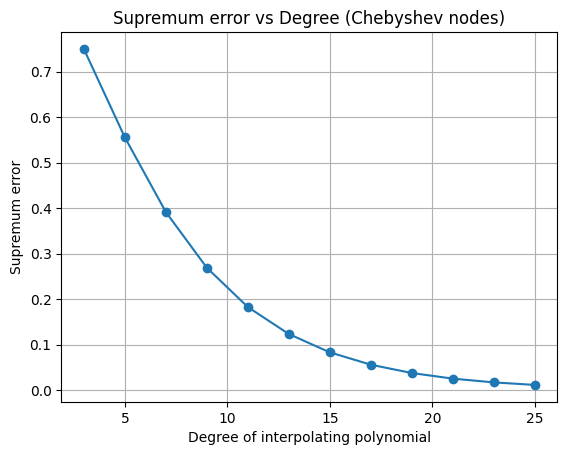

In [12]:
degrees = [2*(i+1) + 1 for i in range(12)]
plt.figure()
plt.plot(degrees, sup_errors, marker='o')
plt.xlabel('Degree of interpolating polynomial')
plt.ylabel('Supremum error')
plt.title('Supremum error vs Degree (Chebyshev nodes)')
# plt.yscale('log')
plt.grid()
plt.show()